# Pre-requisites

**Import libraries**

In [134]:
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#Plotting
import matplotlib.pyplot as plt

# Natural Language Toolkit
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score,confusion_matrix, classification_report,f1_score

from sklearn.feature_extraction.text import TfidfVectorizer

#Traditional ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Deep Learning Libs**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.utils import plot_model

**Read Dataset**

In [0]:
data = pd.read_csv('jobs_dataset.csv')
print(data.columns)
# selecting only IT Jobs
df = data[data['IT']]
# selecting 
cols = ['RequiredQual', 'Eligibility', 'Title', 'JobDescription', 'JobRequirment']
df=df[cols]
df.head(5)

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')


,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
4,- University degree; economical background is ...,NaN,Software Developer,NaN,- Rendering technical assistance to Database M...
15,"- Excellent knowledge of Windows 2000 Server, ...",NaN,Network Administrator,NaN,- Network monitoring and administration;\r\n- ...
19,"As a GD you are creative, innovative and have\...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
34,Participants should be mid-level professionals...,NaN,Demographic Analysis Workshop,NaN,NaN
35,- Work experience of at least two years; \r\n-...,NaN,Programmer,NaN,NaN


**Get count of all job titles**

In [0]:
classes = df['Title'].value_counts()
print(classes)

Software Developer                         134
Web Developer                              101
Java Developer                              88
Graphic Designer                            75
Software Engineer                           69
                                          ... 
Senior Technical Support Engineer            1
Senior OpenGl ES Developer                   1
Senior Mobile Developer                      1
NSS/IP Engineer                              1
C++ Senior Software Developer (Windows)      1
Name: Title, Length: 1272, dtype: int64


**Modifying Job Titles
Selecting only top 21 job titles, to manage class imbalance**

In [0]:
classes = df['Title'].value_counts()[:21]
keys = classes.keys().to_list()

df = df[df['Title'].isin(keys)]
df['Title'].value_counts()

Software Developer           134
Web Developer                101
Java Developer                88
Graphic Designer              75
Senior Java Developer         69
Software Engineer             69
PHP Developer                 65
Senior Software Engineer      63
Programmer                    56
IT Specialist                 55
Senior QA Engineer            43
Senior Software Developer     41
Android Developer             37
.NET Developer                36
Senior .NET Developer         34
Senior PHP Developer          34
iOS Developer                 31
Database Developer            29
Software QA Engineer          29
Senior Web Developer          29
Database Administrator        28
Name: Title, dtype: int64

**Change job titles to base title. For example, changing Senior Java Developer to Java Developer**

In [0]:
def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
        return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x
        
    
df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

Java Developer          157
Software Developer      134
Software Engineer       132
Web Developer           130
PHP Developer            99
Graphic Designer         75
Software QA Engineer     72
.NET Developer           70
Database Admin/Dev       57
Programmer               56
IT Specialist            55
Senior Web Developer     41
Android Developer        37
iOS Developer            31
Name: Title, dtype: int64

In [0]:
df.to_csv('processed_jobs_dataset.csv')

In [0]:
df = pd.read_csv('processed_jobs_dataset.csv')

# Preprocess: Building custom tokenizer to process text

In [175]:
df.head()

,Unnamed: 0,RequiredQual,Eligibility,Title,JobDescription,JobRequirment
0,4,University degree; economical background is a ...,NaN,Software Developer,NaN,- Rendering technical assistance to Database M...
1,19,"As a GD you are creative, innovative and have ...",NaN,Graphic Designer,The position of Graphic Designer (GD) demands ...,Graphic Designer will be responsible for every...
2,35,Work experience of at least two years; Knowle...,NaN,Programmer,NaN,NaN
3,76,Professional background in graphic design; Str...,NaN,Graphic Designer,Ameria CJSC is seeking qualified candidates fo...,- Design of company production packaging;\r\n-...
4,92,"Degree in Computer Science, Information Techno...",NaN,Software Developer,"Synergy International Systems, Inc./Armenia se...",Specific tasks and key responsibilities includ...


In [0]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        # lemmatize text - convert to base form 
        self.wnl = WordNetLemmatizer()
        # creating stopwords list, to ignore lemmatizing stopwords 
        self.stopwords = stopwords.words('english')
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.stopwords]

# removing new line characters, and certain hypen patterns                  
df['RequiredQual']=df['RequiredQual'].apply(lambda x: x.replace('\n', ' ').replace('\r', '').replace('- ', ''). replace(' - ', ' to '))

**Top 10 Job Profiles**

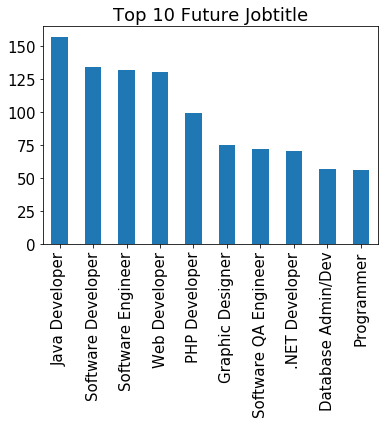

In [146]:
df.Title.value_counts().head(10).plot.bar(title="Top 10 Future Jobtitle")

## Vectorize + Convert to array

In [0]:
# train features and labels 
y = df['Title']
X = df['RequiredQual']

In [148]:
print("X Shape : " + str(X.shape))
print("y Shape : " + str(y.shape))

X Shape : (1146,)
y Shape : (1146,)


In [149]:
print("Sample input")
print(X.iloc[0])
print("**************")
print("Sample output")
print(y.iloc[0])

Sample input
University degree; economical background is a plus; Excellent knowledge of Windows 2000 Server, Networking TCP/ IP technologies, MS SQL 2000 Server, Visual Basic 6; At least 2 years of experience in database software development; Good knowledge of English. REMUNERATION:  Will be commensurate with the norms accepted in the Company.
**************
Sample output
Software Developer


**Construct the vectorizer**

In [150]:
# tdif feature rep 
vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
vectorizer.fit(X)
# transforming text to tdif features
tfidf_matrix = vectorizer.transform(X)
X_tdif = tfidf_matrix.toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [151]:
print("tfidf_matrix Shape : " + str(tfidf_matrix.shape))
print("X_tdif Shape : " + str(X_tdif.shape))

tfidf_matrix Shape : (1146, 2902)
X_tdif Shape : (1146, 2902)


**Encoding text labels in categories**

In [0]:
enc = LabelEncoder() 
enc.fit(y.values)
y_enc=enc.transform(y.values)

In [157]:
print("y_enc Shape : " + str(y_enc.shape))

y_enc Shape : (1146,)


**Train-Test Split**

In [0]:
X_train_words, X_test_words, y_train, y_test = train_test_split(X, y_enc, test_size=0.15, random_state=10)

In [159]:
print("X_train_words Shape : " + str(X_train_words.shape))
print("X_test_words Shape : " + str(X_test_words.shape))
print("y_train Shape : " + str(y_train.shape))
print("y_test Shape : " + str(y_test.shape))

X_train_words Shape : (974,)
X_test_words Shape : (172,)
y_train Shape : (974,)
y_test Shape : (172,)


**Vectoring X_train & X_test**

In [0]:
X_train = vectorizer.transform(X_train_words)
X_train = X_train.toarray()

X_test = vectorizer.transform(X_test_words)
X_test = X_test.toarray()

In [161]:
X_train[0]

array([0.        , 0.10643785, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [162]:
y_train[0]

0

# Model 1 : Naive Bayes

**Build the model**

In [163]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
train_preds = gnb.predict(X_train)
test_preds = gnb.predict(X_test)

print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))


Train acc: 0.9455852156057495
Test acc: 0.6918604651162791


In [164]:
print("Detailed classification report:")
y_true, gnb_pred = y_test, gnb.predict(X_test)
print(classification_report(y_true, gnb_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.80      0.80      0.80         5
           2       0.67      0.67      0.67         6
           3       0.91      0.77      0.83        13
           4       0.62      0.50      0.56        10
           5       0.71      0.85      0.77        20
           6       0.62      0.71      0.67        14
           7       0.71      0.50      0.59        10
           8       0.67      0.67      0.67         6
           9       0.58      0.48      0.52        23
          10       0.73      0.70      0.71        23
          11       0.86      0.86      0.86         7
          12       0.63      0.89      0.74        19
          13       1.00      0.25      0.40         4

    accuracy                           0.69       172
   macro avg       0.73      0.67      0.68       172
weighted avg       0.70      0.69      0.68     

In [165]:
confusion = confusion_matrix(y_test, gnb_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 9  0  0  0  0  0  0  0  0  1  1  0  1  0]
 [ 0  4  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  5  1  0  0  0  2  1  1  0  0]
 [ 0  0  0  0  1 17  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  1 10  0  1  0  0  0  2  0]
 [ 0  0  0  0  2  0  1  5  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  4  1  0  0  0  0]
 [ 3  0  2  1  0  2  1  1  0 11  0  0  2  0]
 [ 0  0  0  0  0  2  1  1  0  2 16  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0 17  0]
 [ 0  1  0  0  0  0  1  0  0  0  1  0  0  1]]


**Save the model**

In [0]:
gnb_file = open('gnb.pckl', 'wb')
pickle.dump(gnb, gnb_file)
gnb_file.close()

In [166]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

# Model 2 : Logistic Regression


**Build the model**

In [19]:
logistic = LogisticRegression(max_iter=15,verbose=1, C=0.75)
logistic.fit(X_train, y_train)
train_preds = logistic.predict(X_train)
test_preds = logistic.predict(X_test)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.8757700205338809
Test acc: 0.7383720930232558


In [21]:
logistic.get_params()

{'C': 0.75,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 15,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [104]:
print("Detailed classification report:")
y_true, logistic_pred = y_test, logistic.predict(X_test)
print(classification_report(y_true, logistic_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       1.00      1.00      1.00         5
           2       0.75      0.50      0.60         6
           3       1.00      1.00      1.00        13
           4       0.88      0.70      0.78        10
           5       0.72      0.90      0.80        20
           6       0.79      0.79      0.79        14
           7       0.86      0.60      0.71        10
           8       0.00      0.00      0.00         6
           9       0.50      0.65      0.57        23
          10       0.78      0.61      0.68        23
          11       1.00      1.00      1.00         7
          12       0.58      0.79      0.67        19
          13       1.00      0.75      0.86         4

    accuracy                           0.74       172
   macro avg       0.76      0.72      0.73       172
weighted avg       0.74      0.74      0.73     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
confusion = confusion_matrix(y_test, logistic_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  1  1  0  1  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  1  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  1  0  0  2  0]
 [ 0  0  1  0  0  0  0  6  0  1  0  0  2  0]
 [ 0  0  0  0  0  2  0  0  0  3  1  0  0  0]
 [ 2  0  0  0  0  1  0  0  0 15  0  0  5  0]
 [ 0  0  0  0  1  3  1  1  0  3 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  2  0  0  2  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  3]]


**Save the model**

In [0]:
logistic_file = open('logistic.pckl', 'wb')
pickle.dump(logistic, logistic_file)
logistic_file.close()

# Model 3 : Random Forest

**Build the model**

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
clf.fit(X_train, y_train)
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)


In [25]:
print('Train acc: {0}'.format(accuracy_score(y_train, train_preds)))
print('Test acc: {0}'.format(accuracy_score(y_test, test_preds)))

Train acc: 0.919917864476386
Test acc: 0.6976744186046512


In [106]:
print("Detailed classification report:")
y_true, clf_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, clf_pred))

Detailed classification report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      1.00      0.91         5
           2       0.80      0.67      0.73         6
           3       1.00      0.92      0.96        13
           4       1.00      0.60      0.75        10
           5       0.77      0.85      0.81        20
           6       0.67      0.71      0.69        14
           7       0.75      0.30      0.43        10
           8       1.00      0.17      0.29         6
           9       0.42      0.57      0.48        23
          10       0.74      0.61      0.67        23
          11       0.88      1.00      0.93         7
          12       0.54      0.79      0.64        19
          13       1.00      0.75      0.86         4

    accuracy                           0.70       172
   macro avg       0.80      0.70      0.71       172
weighted avg       0.74      0.70      0.69     

In [107]:
confusion = confusion_matrix(y_test, clf_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[10  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0 12  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0 17  1  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  3  0  4  0  1  2  0]
 [ 0  0  0  0  0  1  0  0  1  3  1  0  0  0]
 [ 2  0  1  0  0  1  1  0  0 13  1  0  4  0]
 [ 0  0  0  0  0  3  1  1  0  3 14  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  2  0  0  2  0  0 15  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  3]]


**Save the model**

In [0]:
randomforest_file = open('randomforest.pckl', 'wb')
pickle.dump(clf, randomforest_file)
randomforest_file.close()

In [27]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# NN

## Model 1

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [32]:
enc.fit(y_train.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [0]:
onehotlabels_train = enc.transform(y_train.reshape(-1,1)).toarray()
onehotlabels_test = enc.transform(y_test.reshape(-1,1)).toarray()

In [34]:
print(onehotlabels_train[0])
print(onehotlabels_test[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
X_train.shape

(974, 2902)

In [37]:
X_test.shape[1]

2902

In [0]:
model_1 = Sequential() 
model_1.add(Dense(units=1024, input_dim=X_test.shape[1], kernel_initializer='RandomNormal', activation='elu'))
model_1.add(Dense(units=512,kernel_initializer='RandomNormal', activation='selu'))
model_1.add(Dense(units=128,kernel_initializer='RandomNormal', activation='selu'))
model_1.add(Dense(units=64,kernel_initializer='RandomNormal', activation='selu'))
model_1.add(Dense(units=32,kernel_initializer='RandomNormal', activation='selu'))
model_1.add(Dense(units=14,kernel_initializer='uniform', activation='sigmoid'))


model_1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
train_history_1 = model_1.fit(x=X_train, y=onehotlabels_train,  
                          validation_split=0.3, epochs=10, 
                          batch_size=64, verbose=2) 

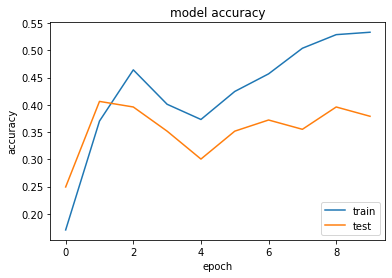

In [54]:
plt.plot(train_history_1.history['acc'])
plt.plot(train_history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

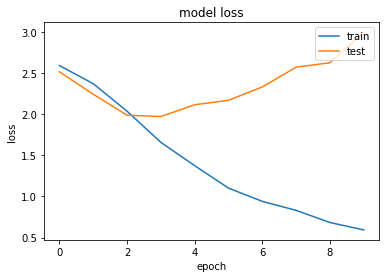

In [55]:
plt.plot(train_history_1.history['loss'])
plt.plot(train_history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [56]:
ans=model_1.predict(X_test[0:60])
print("Input")
# print(X_test[0:20])
print("Ans")
print([np.argmax(x) for x in ans])
print("Actual")
print([np.argmax(x) for x in onehotlabels_test[0:60]])

Input
Ans
[1, 12, 12, 10, 9, 12, 8, 12, 1, 7, 9, 10, 9, 9, 0, 2, 12, 0, 2, 12, 10, 12, 9, 8, 12, 12, 9, 10, 1, 12, 12, 10, 10, 1, 12, 10, 7, 10, 8, 10, 12, 7, 8, 12, 9, 0, 12, 1, 10, 10, 4, 2, 7, 2, 0, 12, 9, 10, 12, 0]
Actual
[1, 6, 12, 5, 10, 6, 1, 4, 1, 4, 3, 9, 9, 9, 11, 11, 9, 9, 7, 3, 10, 3, 0, 1, 9, 12, 0, 10, 13, 12, 12, 5, 5, 1, 12, 10, 7, 5, 8, 5, 6, 7, 6, 3, 10, 0, 10, 13, 5, 10, 4, 2, 7, 11, 0, 2, 9, 5, 12, 9]


In [57]:
scores = model_1.evaluate(X_test, onehotlabels_test)
print('\n')
print('accuracy=',scores[1])

172/172 [==============================] - 0s 371us/step


accuracy= 0.40697674349296925


In [0]:
model_1.save('model_1_a.h5')

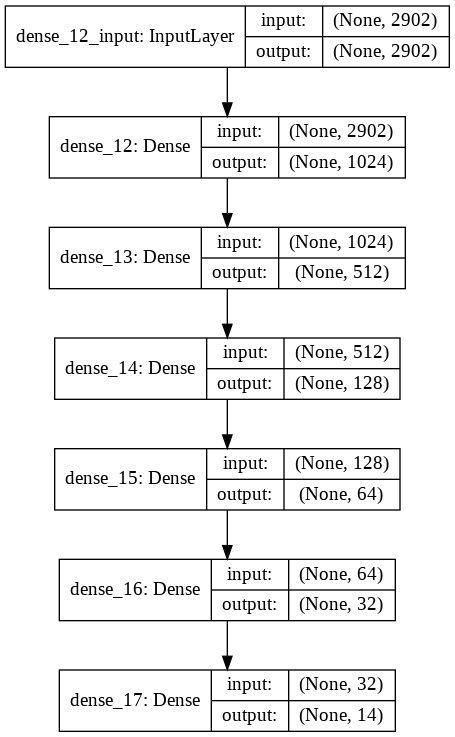

In [110]:
plot_model(model_1, to_file='model1.png', show_shapes=True, show_layer_names=True)

## Model 2

In [0]:
model_2 = Sequential() 
model_2.add(Dense(units=1024, input_dim=X_test.shape[1], kernel_initializer='RandomNormal', activation='elu'))
model_2.add(Dense(units=512,kernel_initializer='RandomNormal', activation='selu'))
model_2.add(Dense(units=256,kernel_initializer='RandomNormal', activation='selu'))
model_2.add(Dense(units=128,kernel_initializer='RandomNormal', activation='selu'))
model_2.add(Dense(units=64,kernel_initializer='RandomNormal', activation='selu'))
model_2.add(Dense(units=32,kernel_initializer='RandomNormal', activation='selu'))
model_2.add(Dense(units=14,kernel_initializer='uniform', activation='softmax'))


model_2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [62]:
train_history_2 = model_2.fit(x=X_train, y=onehotlabels_train,  
                          validation_split=0.3, epochs=15, 
                          batch_size=64, verbose=2) 

Train on 681 samples, validate on 293 samples
Epoch 1/15
 - 1s - loss: 0.0327 - acc: 0.9883 - val_loss: 2.2224 - val_acc: 0.6689
Epoch 2/15
 - 1s - loss: 0.0182 - acc: 0.9883 - val_loss: 2.2296 - val_acc: 0.6655
Epoch 3/15
 - 1s - loss: 0.0193 - acc: 0.9927 - val_loss: 2.2863 - val_acc: 0.6689
Epoch 4/15
 - 1s - loss: 0.0180 - acc: 0.9927 - val_loss: 2.2226 - val_acc: 0.6894
Epoch 5/15
 - 1s - loss: 0.0392 - acc: 0.9912 - val_loss: 2.5891 - val_acc: 0.6553
Epoch 6/15
 - 1s - loss: 0.0441 - acc: 0.9838 - val_loss: 2.3072 - val_acc: 0.6724
Epoch 7/15
 - 1s - loss: 0.0336 - acc: 0.9883 - val_loss: 2.3227 - val_acc: 0.6860
Epoch 8/15
 - 1s - loss: 0.0171 - acc: 0.9927 - val_loss: 2.2705 - val_acc: 0.6587
Epoch 9/15
 - 1s - loss: 0.0223 - acc: 0.9927 - val_loss: 2.2599 - val_acc: 0.6792
Epoch 10/15
 - 1s - loss: 0.0241 - acc: 0.9927 - val_loss: 2.2266 - val_acc: 0.6689
Epoch 11/15
 - 1s - loss: 0.0187 - acc: 0.9912 - val_loss: 2.2224 - val_acc: 0.6758
Epoch 12/15
 - 1s - loss: 0.0194 - acc:

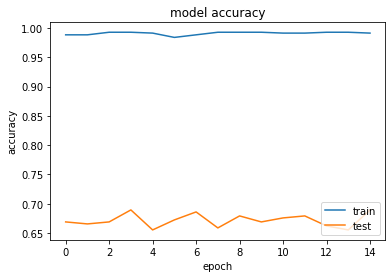

In [63]:
plt.plot(train_history_2.history['acc'])
plt.plot(train_history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

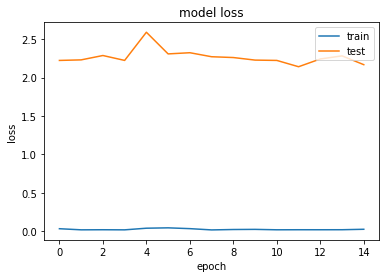

In [64]:
plt.plot(train_history_2.history['loss'])
plt.plot(train_history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
ans=model_2.predict(X_test[0:60])
print("Input")
# print(X_test[0:20])
print("Ans")
print([np.argmax(x) for x in ans])
print("Actual")
print([np.argmax(x) for x in onehotlabels_test[0:60]])

Input
Ans
[13, 6, 12, 5, 9, 6, 1, 4, 1, 7, 7, 5, 9, 9, 11, 11, 12, 8, 2, 3, 10, 3, 0, 1, 12, 12, 10, 10, 13, 12, 12, 10, 5, 1, 12, 5, 7, 5, 9, 5, 6, 7, 13, 3, 9, 0, 9, 13, 5, 10, 4, 2, 7, 11, 0, 12, 9, 5, 12, 0]
Actual
[1, 6, 12, 5, 10, 6, 1, 4, 1, 4, 3, 9, 9, 9, 11, 11, 9, 9, 7, 3, 10, 3, 0, 1, 9, 12, 0, 10, 13, 12, 12, 5, 5, 1, 12, 10, 7, 5, 8, 5, 6, 7, 6, 3, 10, 0, 10, 13, 5, 10, 4, 2, 7, 11, 0, 2, 9, 5, 12, 9]


In [68]:
scores = model_2.evaluate(X_test, onehotlabels_test)
print('\n')
print('accuracy=',scores[1])

172/172 [==============================] - 0s 494us/step


accuracy= 0.7093023241952409


In [0]:
model_2.save('model_2_a.h5')

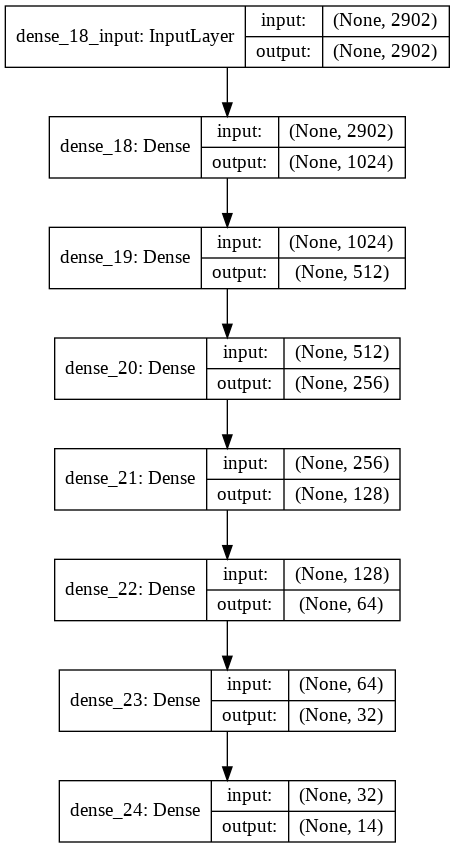

In [111]:
plot_model(model_2, to_file='model2.png', show_shapes=True, show_layer_names=True)

## Model 3

In [0]:
from keras.layers import Dropout

In [0]:
model_3 = Sequential() 
model_3.add(Dense(units=1024, input_dim=X_test.shape[1], kernel_initializer='RandomNormal', activation='elu'))
model_3.add(Dense(units=512,kernel_initializer='RandomNormal', activation='selu'))
model_3.add(Dropout(0.3));
model_3.add(Dense(units=256,kernel_initializer='RandomNormal', activation='selu'))
model_3.add(Dense(units=128,kernel_initializer='RandomNormal', activation='selu'))
model_3.add(Dense(units=64,kernel_initializer='RandomNormal', activation='selu'))
model_3.add(Dense(units=32,kernel_initializer='RandomNormal', activation='selu'))
model_3.add(Dense(units=14,kernel_initializer='uniform', activation='softmax'))


model_3.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [94]:
train_history_3 = model_3.fit(x=X_train, y=onehotlabels_train,  
                          validation_split=0.3, epochs=15, 
                          batch_size=64, verbose=2) 

Train on 681 samples, validate on 293 samples
Epoch 1/15
 - 3s - loss: 2.5479 - acc: 0.1894 - val_loss: 2.3925 - val_acc: 0.2594
Epoch 2/15
 - 1s - loss: 2.0329 - acc: 0.4097 - val_loss: 1.8353 - val_acc: 0.3481
Epoch 3/15
 - 1s - loss: 1.3574 - acc: 0.4963 - val_loss: 1.4492 - val_acc: 0.4983
Epoch 4/15
 - 1s - loss: 0.8770 - acc: 0.7181 - val_loss: 1.3249 - val_acc: 0.5973
Epoch 5/15
 - 1s - loss: 0.5012 - acc: 0.8561 - val_loss: 1.2777 - val_acc: 0.6621
Epoch 6/15
 - 1s - loss: 0.2595 - acc: 0.9280 - val_loss: 1.4735 - val_acc: 0.6860
Epoch 7/15
 - 1s - loss: 0.1663 - acc: 0.9530 - val_loss: 1.5968 - val_acc: 0.6689
Epoch 8/15
 - 1s - loss: 0.0968 - acc: 0.9692 - val_loss: 1.6380 - val_acc: 0.7167
Epoch 9/15
 - 1s - loss: 0.0784 - acc: 0.9794 - val_loss: 1.7951 - val_acc: 0.6894
Epoch 10/15
 - 1s - loss: 0.0865 - acc: 0.9721 - val_loss: 1.8367 - val_acc: 0.6860
Epoch 11/15
 - 1s - loss: 0.0470 - acc: 0.9853 - val_loss: 1.8528 - val_acc: 0.6860
Epoch 12/15
 - 1s - loss: 0.0350 - acc:

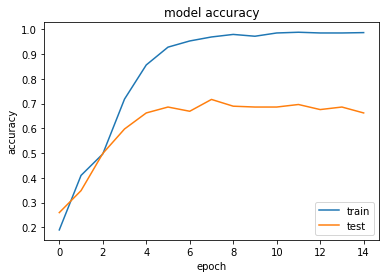

In [95]:
plt.plot(train_history_3.history['acc'])
plt.plot(train_history_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

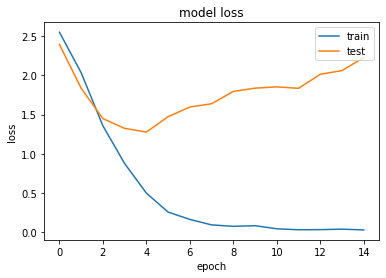

In [96]:
plt.plot(train_history_3.history['loss'])
plt.plot(train_history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [97]:
ans=model_3.predict(X_test[0:60])
print("Input")
# print(X_test[0:20])
print("Ans")
print([np.argmax(x) for x in ans])
print("Actual")
print([np.argmax(x) for x in onehotlabels_test[0:60]])

Input
Ans
[1, 6, 12, 5, 9, 6, 1, 4, 1, 7, 5, 5, 9, 9, 11, 11, 12, 8, 2, 3, 10, 3, 9, 1, 6, 12, 9, 10, 13, 12, 12, 10, 5, 1, 12, 5, 7, 5, 8, 5, 6, 7, 7, 3, 9, 0, 6, 13, 5, 10, 4, 2, 7, 11, 0, 12, 9, 5, 12, 0]
Actual
[1, 6, 12, 5, 10, 6, 1, 4, 1, 4, 3, 9, 9, 9, 11, 11, 9, 9, 7, 3, 10, 3, 0, 1, 9, 12, 0, 10, 13, 12, 12, 5, 5, 1, 12, 10, 7, 5, 8, 5, 6, 7, 6, 3, 10, 0, 10, 13, 5, 10, 4, 2, 7, 11, 0, 2, 9, 5, 12, 9]


In [98]:
scores = model_3.evaluate(X_test, onehotlabels_test)
print('\n')
print('accuracy=',scores[1])

172/172 [==============================] - 0s 457us/step


accuracy= 0.7267441846603571


In [0]:
model_3.save('model_3_a.h5')

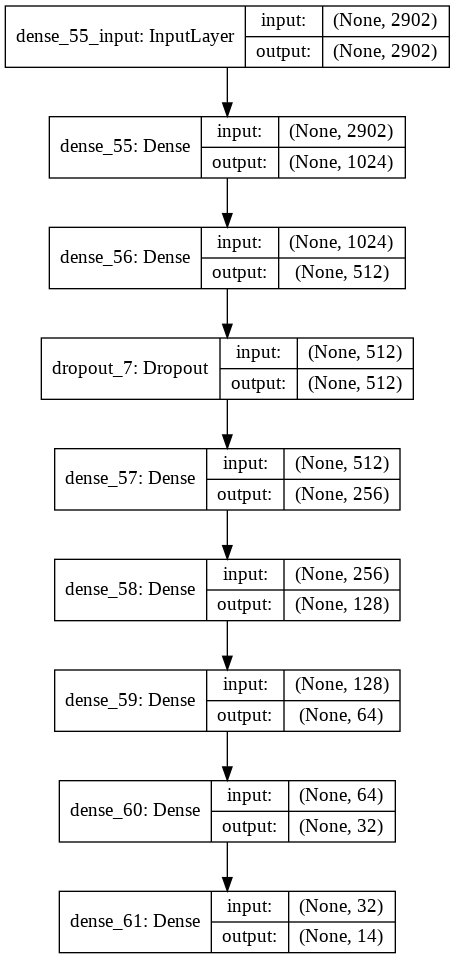

In [112]:
plot_model(model_3, to_file='model3.png', show_shapes=True, show_layer_names=True)

# Creating Job Recommendations 
Recommends 2 job position alternatives given a job requirement. By obtaining probability of class predictions, and picking the top N predictions, other than true label, N closest recommendations can be got

In [0]:
preds_data = {'Current Position': [], 'Current Position Requirments': [], 'Alternative 1': [], 'Alternative 2': []}
y_preds_proba = logistic.predict_proba(X_test)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(y_preds_proba, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    preds_data['Current Position'].append(true_job_position_name[0])
    preds_data['Current Position Requirments'].append(X_test_words.iloc[idx])
    preds_data['Alternative 1'].append(class_names[1])
    preds_data['Alternative 2'].append(class_names[0])
    
    counter +=1

In [0]:
preds_df = pd.DataFrame.from_dict(preds_data)

In [174]:
preds_df.head()

,Current Position,Current Position Requirments,Alternative 1,Alternative 2
0,Android Developer,From 1 to 5 years of experience in Android dev...,iOS Developer,Software Engineer
1,PHP Developer,University degree in the appropriate field of ...,Web Developer,Software Developer
2,Web Developer,At least 3 years of experience with PHP and Ja...,Software Engineer,PHP Developer
3,Java Developer,At least 3 years of work experience as a Java ...,Software Engineer,Software Developer
4,Software Engineer,Bachelor??s degree in Engineering or Informati...,Software Developer,Web Developer


# Inference on user provided data

**Get a single instance for testing**

In [167]:
inference_test=X_test_words.iloc[0]
inference_test

'From 1 to 5 years of experience in Android development; Fast learner; Good team player with the ability to accept criticism; Experience in streaming and SIP technologies is a plus.'

**Vectorise the inference_test**

In [0]:
inference_test_vectorized = vectorizer.transform([inference_test])
inference_test_vectorized = inference_test_vectorized.toarray()

In [169]:
inference_test_vectorized

array([[0., 0., 0., ..., 0., 0., 0.]])

**Get Job Recommendation**

In [0]:
inference_preds_data = {'Current Position': [], 'Current Position Requirments': [], 'Alternative 1': [], 'Alternative 2': []}
inference_y_preds_proba = logistic.predict_proba(inference_test_vectorized)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(inference_y_preds_proba, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    inference_preds_data['Current Position'].append(true_job_position_name[0])
    inference_preds_data['Current Position Requirments'].append(X_test_words.iloc[idx])
    inference_preds_data['Alternative 1'].append(class_names[1])
    inference_preds_data['Alternative 2'].append(class_names[0])
    
    counter +=1

In [171]:
inference_preds_df = pd.DataFrame.from_dict(inference_preds_data)
inference_preds_df.head()

,Current Position,Current Position Requirments,Alternative 1,Alternative 2
0,Android Developer,From 1 to 5 years of experience in Android dev...,iOS Developer,Software Engineer


**NN**

In [0]:
inference_preds_data_nn = {'Current Position': [], 'Current Position Requirments': [], 'Alternative 1': [], 'Alternative 2': []}
inference_y_preds_proba_nn = model_3.predict_proba(inference_test_vectorized)

counter = 0 
for idx, (pred_row, true_job_position) in enumerate(zip(inference_y_preds_proba_nn, y_test)):
    class_preds = np.argsort(pred_row)
    # delete true class
    for i in [-1, -2]:
        if class_preds[i] == true_job_position:
            class_preds=np.delete(class_preds,i)
    # getting other 2 highest job predictions         
    top_classes = class_preds[-2:]
    # obtaining class name string from int label 
    class_names = enc.inverse_transform(top_classes)
    true_job_position_name = enc.inverse_transform([true_job_position])
    # saving to dict
    inference_preds_data_nn['Current Position'].append(true_job_position_name[0])
    inference_preds_data_nn['Current Position Requirments'].append(X_test_words.iloc[idx])
    inference_preds_data_nn['Alternative 1'].append(class_names[1])
    inference_preds_data_nn['Alternative 2'].append(class_names[0])
    
    counter +=1

In [183]:
inference_preds_df = pd.DataFrame.from_dict(inference_preds_data_nn)
inference_preds_df.head()

,Current Position,Current Position Requirments,Alternative 1,Alternative 2
0,Android Developer,From 1 to 5 years of experience in Android dev...,iOS Developer,IT Specialist
